In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a68173e66a6d1267babcebbbbef3aac6125c342212bae27227e3019f74624207
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


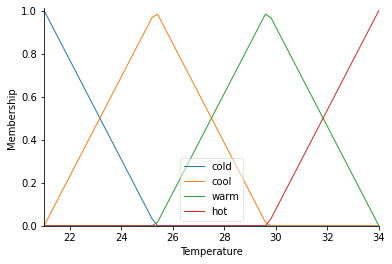

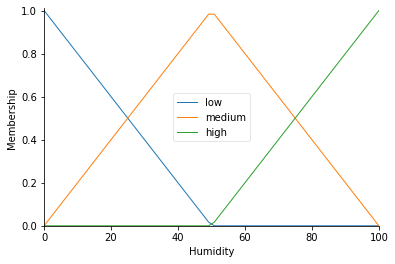

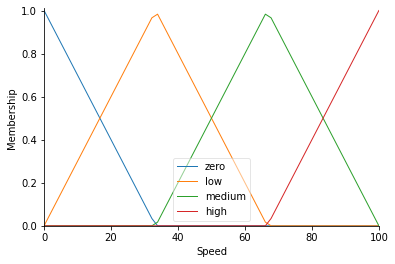

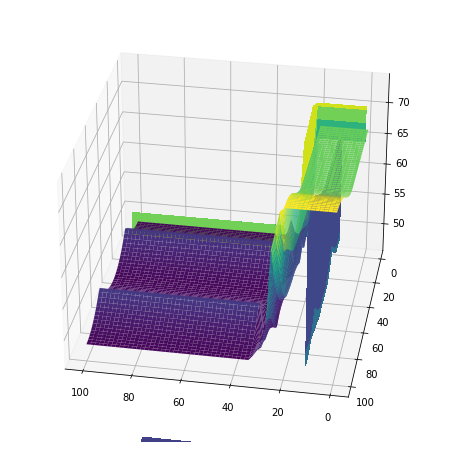

In [12]:
from networkx.algorithms.bipartite import projection
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe_temperature = np.linspace(21,34,60)
universe_humidity = np.linspace(0,100,60)
universe_speed = np.linspace(0,100,60)

temperature = ctrl.Antecedent(universe_temperature,'Temperature')
humidity = ctrl.Antecedent(universe_humidity,'Humidity')
speed = ctrl.Consequent(universe_speed,'Speed')

name_temperature = ['cold','cool','warm','hot']
name_humidity = ['low','medium','high']
name_speed = ['zero','low','medium','high']
temperature.automf(names=name_temperature)
humidity.automf(names=name_humidity)
speed.automf(names=name_speed)

temperature.view()
humidity.view()
speed.view()

rule1 = ctrl.Rule(antecedent=((temperature['hot']&humidity['high'])|(temperature['warm']&humidity['medium'])|(temperature['hot']&humidity['medium'])|(temperature['warm']&humidity['low'])|(temperature['hot']&humidity['low'])),consequent=speed['zero'])
rule2 = ctrl.Rule(antecedent=((temperature['warm']&humidity['high'])|(temperature['cool']&humidity['medium'])|(temperature['cool']&humidity['low'])),consequent=speed['low'])
rule3 = ctrl.Rule(antecedent=((temperature['cool']&humidity['high'])|(temperature['cold']&humidity['medium'])|(temperature['cool']&humidity['low'])),consequent=speed['medium'])
rule4 = ctrl.Rule(antecedent=(temperature['cold']&humidity['high']),consequent=speed['high'])
rule5 = ctrl.Rule(antecedent=((temperature['cold']|temperature['cool']|temperature['warm']|temperature['hot'])|(humidity['low']|humidity['medium']|humidity['high'])),consequent=speed['medium'])

computing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
sim = ctrl.ControlSystemSimulation(computing_ctrl,flush_after_run=100*100+1)
upsampled = np.linspace(0,100,60)
x,y = np.meshgrid(upsampled,upsampled)
z = np.zeros_like(x)
for i in range(60):
  for j in range(60):
    sim.input['Temperature'] = x[i,j]
    sim.input['Humidity'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Speed']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride = 1,cstride = 1,cmap = 'viridis',linewidth = 0.4,antialiased = True)
cset = ax.contourf(x,y,z,zdir='z',offset = 9,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='x',offset = 11,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='y',offset = 11,cmap = 'viridis')
ax.view_init(30,100)